In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import obspy
from obspy import UTCDateTime

In [3]:
from obspy.fdsn import Client
client = Client("USGS")

start = UTCDateTime("2015-04-25")
end= UTCDateTime("2015-05-25")

In [4]:
start = UTCDateTime()

In [5]:
end = UTCDateTime()
start = end - (60*60*24*7)
start

2015-05-20T05:05:37.629973Z

In [112]:
def get_largest(client="USGS", domain=10., background=None, minmagnitude=5.5):
    """
    Function to return the largest earthquake in past week, 
    Then plot the region, as well as some background
    """
    client = Client(client)
    #Get the current time and 1 week previous
    end = UTCDateTime()
    start = end - (60*60*24*7)
    #print(start, end)
    cat = client.get_events(starttime=start, endtime=end, minmagnitude=minmagnitude)
    ##Get lat, lon, depth, mag
    lats = []
    lons = []
    depths = []
    mags = []
    times = []
    print(len(cat))
    for event in cat:
        origin = event.origins[0]
        lats.append(origin.latitude)
        lons.append(origin.longitude)
        depths.append(origin.depth)
        times.append(origin.time)
        magnitude = event.magnitudes[0]
        mag = magnitude.mag
        mags.append(mag)
    return lats, lons,depths, mags, times

In [113]:
ev = cat[0]
ors = ev.origins[0]
ors.depth

4755.0

In [114]:
len(cat)

1696

In [115]:
test = get_largest(client="USGS", domain=10., background=None)

11


/Users/dansandiford/anaconda/lib/python2.7/site-packages/obspy/core/event.py:3322: UserWarning: Event 'quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc72453831&format=quakeml' does not have a magnitude and will not be plotted.
  warnings.warn(msg)


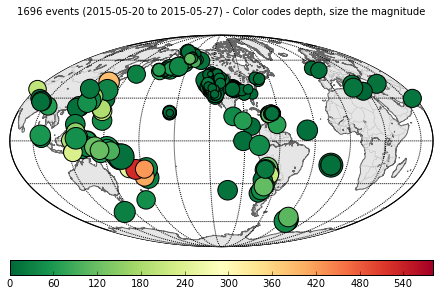

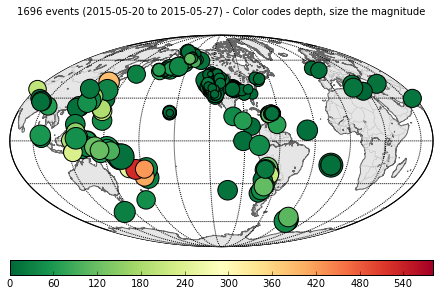

In [10]:
cat.plot()